In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

In [2]:
%config IPCompleter.greedy=True
#%config NotebookApp.iopub_data_rate_limit=1.0e10

In [3]:
data = open('/home/shobhit/NewDataset/UCI HAR Dataset/train/X_train.txt')

In [4]:
lines = data.readlines()
len(lines)

7352

In [5]:
lines[1]

'  2.7841883e-001 -1.6410568e-002 -1.2352019e-001 -9.9824528e-001 -9.7530022e-001 -9.6032199e-001 -9.9880719e-001 -9.7491437e-001 -9.5768622e-001 -9.4306751e-001 -5.5785126e-001 -8.1840869e-001  8.4930787e-001  6.8584458e-001  8.2263681e-001 -9.8193011e-001 -9.9999130e-001 -9.9978838e-001 -9.9840537e-001 -9.9915036e-001 -9.7786550e-001 -9.4822478e-001 -7.1489166e-001 -5.0093000e-001 -5.7097906e-001  6.1162716e-001 -3.2954862e-001  2.8421321e-001  2.8459454e-001  1.1570542e-001 -9.0962529e-002  2.9431041e-001 -2.8121057e-001  8.5988430e-002 -2.2152694e-002 -1.6656535e-002 -2.2064350e-001 -1.3428663e-002 -7.2691890e-002  5.7938169e-001  9.6656113e-001 -1.4155127e-001  1.0937881e-001 -9.9741134e-001 -9.8944741e-001 -9.3163868e-001 -9.9788359e-001 -9.8961366e-001 -9.3324040e-001  8.9206031e-001 -1.6134256e-001  1.2258573e-001  9.8452014e-001 -1.1489334e-001  1.0276411e-001 -3.8342955e-001  9.0782890e-001 -9.7058275e-001 -9.7850045e-001 -9.9918838e-001 -9.9002851e-001 -9.4168540e-001 -1.000

In [6]:
new_lines=[]
for i,line in enumerate(lines):
    temp = line.strip('\n')
    temp = temp.strip('  ')
    temp = re.sub("\s+",",",temp.strip())
    a=[float(e) for e in temp.split(',')]
    new_lines.append(a)

In [7]:
z=np.array(new_lines)
z.shape

(7352, 561)

In [25]:
#pca = PCA(n_components=4)
#pca.fit(z)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
#print(pca.explained_variance_ratio_)

[0.6255444  0.04913023 0.04121467 0.01874956]


In [10]:
#sample = pca.transform(z)
#sample[9]
scale=StandardScaler()
scale.fit(z)
sample=scale.transform(z)
pca = PCA(n_components=4)
pca.fit(sample)
sample = pca.transform(sample)

**Elbow after performing PCA on data**

In [11]:
SD_INDEX={}
K = range(9,1,-1)
alpha=0
#Variance of whole data and its Euclidean Norm
sample_variance = pd.DataFrame(sample,columns=["PC1","PC2","PC3","PC4"]).var()
sample_variance_norm = LA.norm(sample_variance,2)
#print("Sample variance ="+str(sample_variance))
for k in K :
    SD_INDEX[k]=0
    sum_inverse_dist=0
    variance_norm=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    
    centers = kmeansModel.cluster_centers_
    pairwise_center_dist = euclidean_distances(centers)
    #print(pairwise_center_dist)
    
    #Maximum and Minimum distance between cluster centers
    D_max = pairwise_center_dist.max()
    D_min = pairwise_center_dist[np.nonzero(pairwise_center_dist)].min()
    
    sample_transformed = kmeansModel.fit_transform(sample)
    for i in range(0,k):
        cluster_datapoints = pd.DataFrame(sample[labels==i],columns=["PC1","PC2","PC3","PC4"])
        #print(cluster_datapoints.head())
        
        #Mean Value of each dimention of datapoints in this cluster
        cluster_mean = cluster_datapoints.mean(axis=0)
        
        # Calculating Average Scattering for cluster
        cluster_variance = cluster_datapoints.var()
        #print(cluster_variance)
        
        # Calculating sum of Euclidean Norm or variance measured above for each cluster
        variance_norm += LA.norm(cluster_variance,2)
        #print("variance ="+str(variance_norm))
        
        #Caculating Seperation betwrrn clusters "D"
        sum_inverse_dist = sum_inverse_dist + 1/pairwise_center_dist.sum() 
        
    mean_var_norm=variance_norm/k
    avg_scattering =  mean_var_norm/sample_variance_norm
    print("Avg Scatering ="+str(avg_scattering))
    
    D = (D_max/D_min)*sum_inverse_dist
    print("D = "+str(D))
    
    if(k==9):
        alpha = D
    print("constant = "+str(alpha))
    
    C = (alpha*avg_scattering) + D
    SD_INDEX[k]=C
    print("SD_index = "+str(SD_INDEX))
    print("//")

Avg Scatering =0.12640685574938348
D = 0.033115451246441316
constant = 0.033115451246441316
SD_index = {9: 0.037301471315225966}
//
Avg Scatering =0.14402397716482376
D = 0.03734245956595327
constant = 0.033115451246441316
SD_index = {8: 0.04211187856007357, 9: 0.037301471315225966}
//
Avg Scatering =0.1580600157142489
D = 0.0413916227408486
constant = 0.033115451246441316
SD_index = {8: 0.04211187856007357, 9: 0.037301471315225966, 7: 0.04662585148524556}
//
Avg Scatering =0.16265893907801005
D = 0.03920497088175749
constant = 0.033115451246441316
SD_index = {8: 0.04211187856007357, 9: 0.037301471315225966, 6: 0.0445914950485932, 7: 0.04662585148524556}
//
Avg Scatering =0.16660360368828547
D = 0.044197991705784985
constant = 0.033115451246441316
SD_index = {8: 0.04211187856007357, 9: 0.037301471315225966, 5: 0.049715145221205834, 6: 0.0445914950485932, 7: 0.04662585148524556}
//
Avg Scatering =0.2019325831744052
D = 0.043003023208179385
constant = 0.033115451246441316
SD_index = {4: 

In [12]:
SSE_array=[]
slope=[]
for key,value in SD_INDEX.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,8):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+1,s])
slope

[0.03974056539988421, 0.04410982125699239, 0.04969011182135936, 0.049715145221205834, 0.0445914950485932, 0.04662585148524556, 0.04211187856007357, 0.037301471315225966]


[[2, 0.0043692558571081855],
 [3, 0.0055802905643669645],
 [4, 2.5033399846476068e-05],
 [5, -0.005123650172612633],
 [6, 0.002034356436652361],
 [7, -0.004513972925171993],
 [8, -0.004810407244847603]]

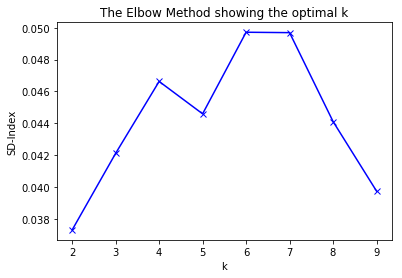

In [13]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('k')
plt.ylabel('SD-Index')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [14]:
slope

[[2, 0.0043692558571081855],
 [3, 0.0055802905643669645],
 [4, 2.5033399846476068e-05],
 [5, -0.005123650172612633],
 [6, 0.002034356436652361],
 [7, -0.004513972925171993],
 [8, -0.004810407244847603]]

In [15]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,6):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope < 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 1
Optimal Number of Clusters = 4
